# Logistic Regression using Gradient Descent

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading Data

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
data.shape

(400, 3)

In [5]:
data.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### Separate X and y, and scale X

In [6]:
data_arr = data.to_numpy()

X = data_arr[:, :-1]
y = data_arr[:, -1].reshape(-1, 1)

X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_scaled[:5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

### Visualizing Data

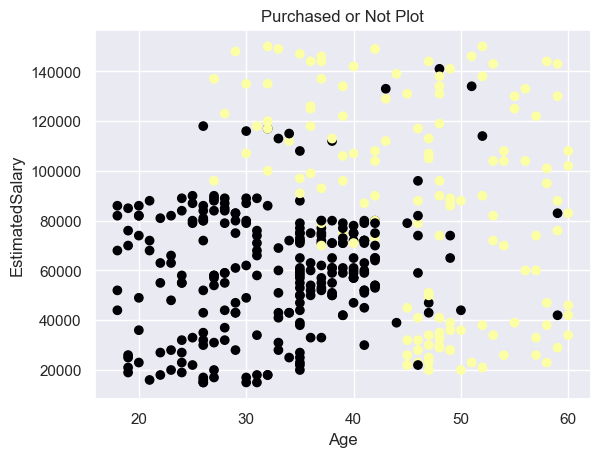

In [7]:
plt.scatter(data['Age'], data['EstimatedSalary'], c=data['Purchased'], cmap='inferno')
plt.title("Purchased or Not Plot")
plt.xlabel('Age')
plt.ylabel("EstimatedSalary")
plt.show()

### Concate X

In [8]:
X_new_1 = np.concat((np.ones((len(X_scaled), 1)), X_scaled), axis=1)
X_new_1[:5]

array([[ 1.        , -1.78179743, -1.49004624],
       [ 1.        , -0.25358736, -1.46068138],
       [ 1.        , -1.11320552, -0.78528968],
       [ 1.        , -1.01769239, -0.37418169],
       [ 1.        , -1.78179743,  0.18375059]])

## Modeling

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hyp(X, theta):
    return sigmoid(np.dot(X, theta))

def cost(X, y, theta):
    h = hyp(X, theta)
    return -np.mean(y*np.log(h) + (1-y)*np.log(1-h))

def grad(X, y, theta):
    h = hyp(X, theta)
    return np.dot(X.T, h-y) / len(y)

### Training

In [10]:
theta = np.zeros((3, 1))
epochs = 800
lr = 0.1
cost_list = []
for epoch in range(epochs):
    h = hyp(X_new_1, theta)
    cost_ = cost(X_new_1, y, theta)
    grad_ = grad(X_new_1, y, theta)
    theta -= lr*grad_
    cost_list.append(cost_)
    if epoch % 10 ==0:
        print(f"Epoch {epoch:03d} Cost: {cost_:.4f}")

Epoch 000 Cost: 0.6931
Epoch 010 Cost: 0.5848
Epoch 020 Cost: 0.5208
Epoch 030 Cost: 0.4802
Epoch 040 Cost: 0.4528
Epoch 050 Cost: 0.4333
Epoch 060 Cost: 0.4188
Epoch 070 Cost: 0.4077
Epoch 080 Cost: 0.3989
Epoch 090 Cost: 0.3919
Epoch 100 Cost: 0.3861
Epoch 110 Cost: 0.3814
Epoch 120 Cost: 0.3773
Epoch 130 Cost: 0.3739
Epoch 140 Cost: 0.3710
Epoch 150 Cost: 0.3685
Epoch 160 Cost: 0.3663
Epoch 170 Cost: 0.3644
Epoch 180 Cost: 0.3627
Epoch 190 Cost: 0.3613
Epoch 200 Cost: 0.3599
Epoch 210 Cost: 0.3588
Epoch 220 Cost: 0.3577
Epoch 230 Cost: 0.3568
Epoch 240 Cost: 0.3559
Epoch 250 Cost: 0.3552
Epoch 260 Cost: 0.3545
Epoch 270 Cost: 0.3538
Epoch 280 Cost: 0.3533
Epoch 290 Cost: 0.3528
Epoch 300 Cost: 0.3523
Epoch 310 Cost: 0.3518
Epoch 320 Cost: 0.3514
Epoch 330 Cost: 0.3511
Epoch 340 Cost: 0.3507
Epoch 350 Cost: 0.3504
Epoch 360 Cost: 0.3502
Epoch 370 Cost: 0.3499
Epoch 380 Cost: 0.3497
Epoch 390 Cost: 0.3494
Epoch 400 Cost: 0.3492
Epoch 410 Cost: 0.3490
Epoch 420 Cost: 0.3489
Epoch 430 C

### Plot Cost

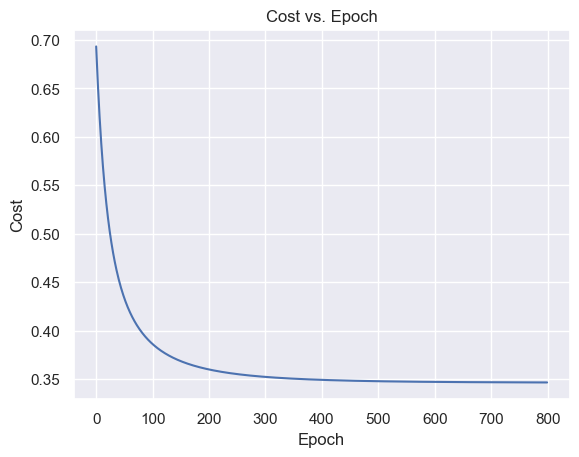

In [11]:
plt.plot(cost_list)
plt.title("Cost vs. Epoch")
plt.ylabel("Cost")
plt.xlabel("Epoch")
plt.show()

## Model Evaluation

In [12]:
h = hyp(X_new_1, theta)
y_hat = np.zeros((len(y), 1))
y_hat[h>=0.5] = 1
print(f"Accuracy: {np.mean(y_hat==y)}")

Accuracy: 0.845


# Logistic Regression using Torch

### Numpy array to Tensor

In [13]:
import torch
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [14]:
X_tensor[:5]

tensor([[-1.7818, -1.4900],
        [-0.2536, -1.4607],
        [-1.1132, -0.7853],
        [-1.0177, -0.3742],
        [-1.7818,  0.1838]])

### Concate X

In [15]:
X_new = torch.cat((torch.ones(X_tensor.size(0), 1), X_tensor), dim=1)
X_new[:5]

tensor([[ 1.0000, -1.7818, -1.4900],
        [ 1.0000, -0.2536, -1.4607],
        [ 1.0000, -1.1132, -0.7853],
        [ 1.0000, -1.0177, -0.3742],
        [ 1.0000, -1.7818,  0.1838]])

## Modeling

$H(x) = \theta_0 + \theta_1 \times X_1 + \theta_2 \times X_2$

In [16]:
def hyp(X, theta):
    return torch.sigmoid(torch.matmul(X, theta))

### Training

In [ ]:
import torch.nn as nn
import torch.optim as optim

theta = torch.zeros((3, 1), dtype=torch.float32, requires_grad=True)
epochs = 500

optimizer = optim.SGD([theta], lr=1)
cost_func = nn.BCELoss()
cost_list = []

for epoch in range(epochs):
    h = hyp(X_new, theta)
    cost = cost_func(h, y_tensor)
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()
    cost_list.append(cost)
    if epoch % 50 == 0:
        print(f'Epoch: {epoch+1:03d} Cost: {cost:.5f}')

Epoch: 001 Cost: 0.69315
Epoch: 051 Cost: 0.34766
Epoch: 101 Cost: 0.34639
Epoch: 151 Cost: 0.34632
Epoch: 201 Cost: 0.34631
Epoch: 251 Cost: 0.34631
Epoch: 301 Cost: 0.34631
Epoch: 351 Cost: 0.34631
Epoch: 401 Cost: 0.34631
Epoch: 451 Cost: 0.34631


### Cost plot

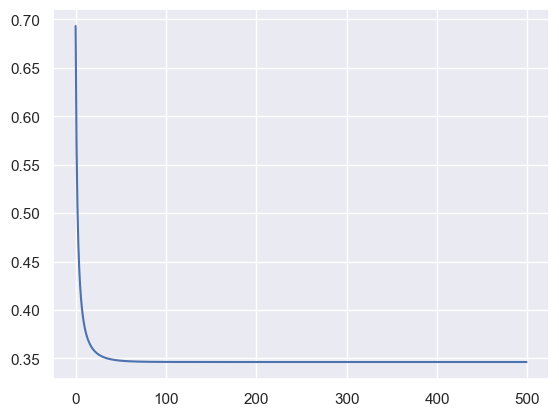

In [18]:
plt.plot(torch.tensor(cost_list).detach())
plt.show()

## Model Evaluation

In [19]:
h = hyp(X_new, theta)
y_hat = torch.clone(y_tensor)
y_hat[h>=0.5] = 1
y_hat[h<0.5] = 0
Accuracy = (y_hat==y_tensor).sum().item() / y_tensor.size(0)
print(f"Accuracy: {Accuracy:.4f}")

Accuracy: 0.8450


# Logistic Regression using Stats Model

In [20]:
import statsmodels.api as sm
# Apply a fix to statsmodels library
from scipy import stats
stats.chisquare = lambda chisq, df: stats.chi2.sf(chisq, df)

### Declare the dependents and independents variable

In [21]:
y = data['Purchased']
X = data[['Age', 'EstimatedSalary']]

### Split data into training and test sets (80/20 split)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,
    random_state=0
)

### Scale features (to make it comparable to scikit-learn's pipeline)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

### Regression

In [24]:
model = sm.Logit(y_train, X_train_scaled)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.434220
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      318
Method:                           MLE   Df Model:                            1
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                  0.3452
Time:                        14:47:58   Log-Likelihood:                -138.95
converged:                       True   LL-Null:                       -212.20
Covariance Type:            nonrobust   LLR p-value:                 1.005e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8774      0.230      8.159      0.000       1.426       2.328
x2             1.0643      0.

### Calculate accuracy

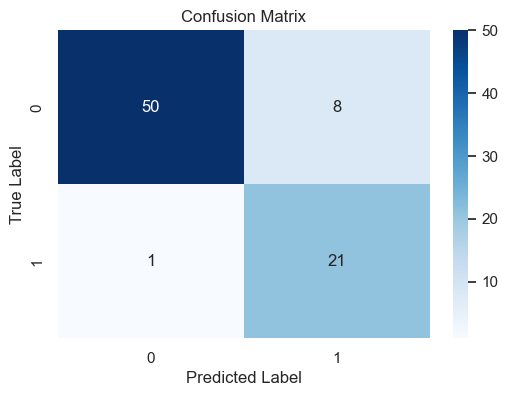

Accuracy: 0.8875


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred_prob = results.predict(X_test_scaled)

y_pred_sm = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]

accuracy_statsmodels = accuracy_score(y_test, y_pred_sm)

cm = confusion_matrix(y_test, y_pred_sm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f"Accuracy: {accuracy_statsmodels}")

# Logistic Regression using Sklearn

### Splitting X and y

In [26]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### Splitting the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
X_train[:5]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000]])

### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train[:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

### Training the Logistic Regression on Training set

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Predicting a new result

In [32]:
print(classifier.predict(sc.transform([[30, 87000]])))

[0]


### Predicting the Test set results

In [33]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


### Making the Confusion Matrix

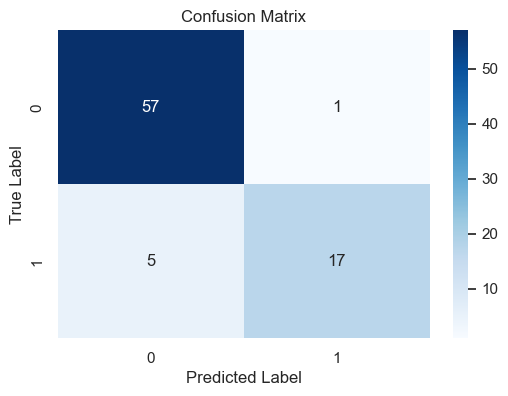

Accuracy: 0.925


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

### Visualising the Training set results

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5692\3911977557.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)


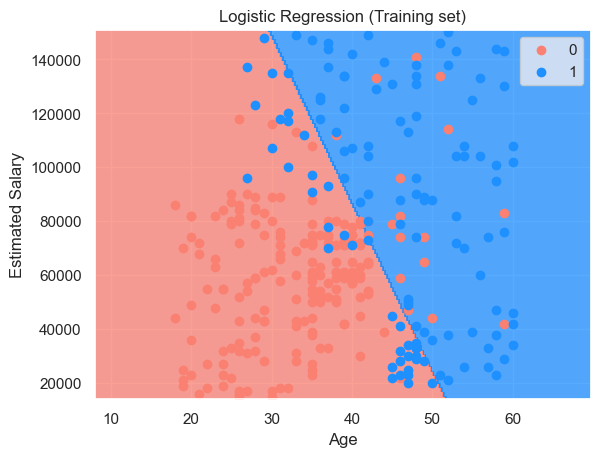

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualising the Test set results

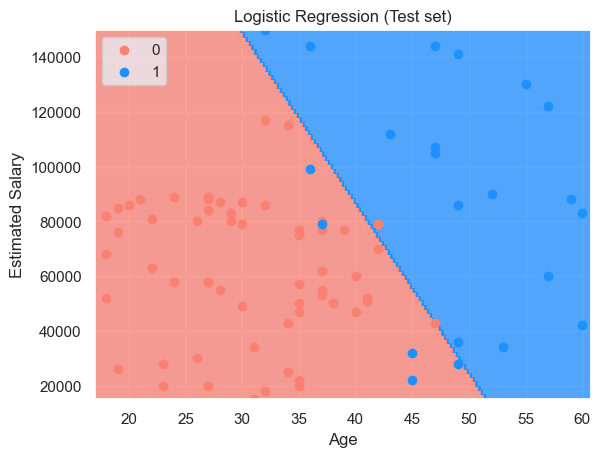

In [36]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
# Create a grid of points
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25)
)
# Predict for each point on the grid
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Define colors for scatter plot
colors = ['#FA8072', '#1E90FF']
# Plot the test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors[i], label=j
    )
# Add titles and labels
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Logistic Regression Using Neural Network

In [37]:
y_tensor = torch.tensor(data['Purchased'].values, dtype=torch.float32).view(-1, 1)

### Modeling

In [38]:
import torch
def model(X, w1, b1, w2, b2, w3, b3):
    a1 = torch.sigmoid(torch.matmul(X, w1) + b1)
    a2 = torch.sigmoid(torch.matmul(a1, w2) + b2)
    output = torch.sigmoid(torch.matmul(a2, w3) + b3)
    return output

### Model Training

In [79]:
import torch.nn as nn
import torch.optim as optim
w1 = torch.randn((2, 5), requires_grad=True)
b1 = torch.randn((1, 5), requires_grad=True)
w2 = torch.randn((5, 5), requires_grad=True)
b2 = torch.randn((1, 5), requires_grad=True)
w3 = torch.randn((5, 1), requires_grad=True)
b3 = torch.randn((1, 1), requires_grad=True)

cost_nn = nn.BCELoss()
optimizer_nn = optim.SGD([w1, b1, w2, b2, w3, b3], lr=1)
cost_list = []

for i in range(2000):
    h = model(X_tensor, w1, b1, w2, b2, w3, b3)
    cost = cost_nn(h, y_tensor)
    cost.backward()
    optimizer_nn.step()
    optimizer_nn.zero_grad()
    cost_list.append(cost)
    print(f"For i = {i+1} Cost = {cost}")

For i = 1 Cost = 0.6694178581237793
For i = 2 Cost = 0.6169998645782471
For i = 3 Cost = 0.610430121421814
For i = 4 Cost = 0.6041414737701416
For i = 5 Cost = 0.5977087616920471
For i = 6 Cost = 0.5911081433296204
For i = 7 Cost = 0.5843291282653809
For i = 8 Cost = 0.5773675441741943
For i = 9 Cost = 0.570225715637207
For i = 10 Cost = 0.5629120469093323
For i = 11 Cost = 0.5554407238960266
For i = 12 Cost = 0.5478314757347107
For i = 13 Cost = 0.5401082038879395
For i = 14 Cost = 0.5322986245155334
For i = 15 Cost = 0.5244328379631042
For i = 16 Cost = 0.5165426135063171
For i = 17 Cost = 0.5086605548858643
For i = 18 Cost = 0.5008191466331482
For i = 19 Cost = 0.4930499196052551
For i = 20 Cost = 0.48538291454315186
For i = 21 Cost = 0.47784605622291565
For i = 22 Cost = 0.4704650044441223
For i = 23 Cost = 0.46326252818107605
For i = 24 Cost = 0.45625826716423035
For i = 25 Cost = 0.4494689106941223
For i = 26 Cost = 0.4429079294204712
For i = 27 Cost = 0.43658578395843506
For i =

### Plot Cost

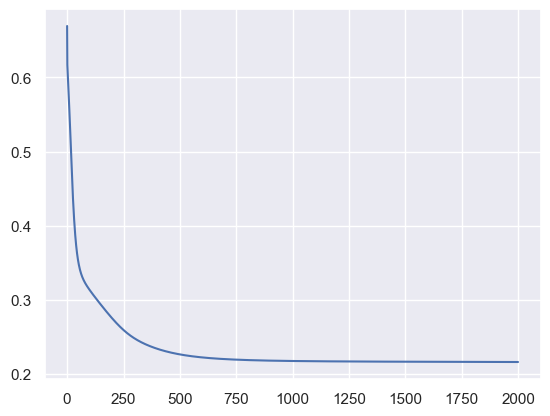

In [80]:
plt.plot(torch.tensor(cost_list).detach().numpy())

### Model Evaluation

In [82]:
# evaluate model 2
h = model(X_tensor, w1, b1, w2, b2, w3, b3)
h = h.reshape(-1,)

y_pred = torch.clone(y_tensor)
y_pred[h>=0.5] = 1
y_pred[h<0.5] = 0
#print(y_pred)
TP = ((y_pred == 1) & (y_tensor == 1)).int().sum()
FP = ((y_pred == 1) & (y_tensor == 0)).int().sum()
FN = ((y_pred == 0) & (y_tensor == 1)).int().sum()

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F_score = 2 * Precision * Recall / (Precision + Recall)

Accuracy2 = (y_pred == y_tensor).int().sum()/len(y_tensor)

print(f'Precision: {Precision:.4f}')
print(f'Recall: {Recall:.4f}')
print(f'F_score: {F_score:.4f}')
print(f'Accuracy: {Accuracy2:.4f}')

Precision: 0.8800
Recall: 0.9231
F_score: 0.9010
Accuracy: 0.9275
